<a href="https://colab.research.google.com/github/rafat0819/Regression-Analysis/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving c_stopwords.csv to c_stopwords.csv


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import re
stop_words = set(stopwords.words('english'))

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from mlxtend.preprocessing import DenseTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df = pd.read_csv('emotion_recog.csv')
df.head()

,tweet_id,sentiment,content
0,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
1,1956967696,sadness,Funeral ceremony...gloomy friday...
2,1956967789,enthusiasm,wants to hang out with friends SOON!
3,1956968416,neutral,@dannycastillo We want to trade with someone w...
4,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...


In [ ]:
group = df.groupby('sentiment', as_index=False)
grp_size = group.size()

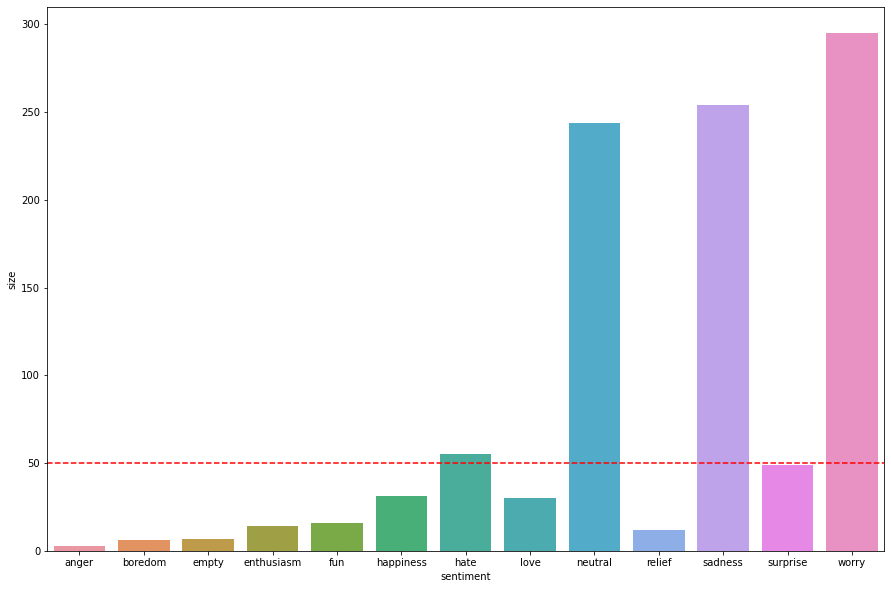

In [ ]:
plt.figure(figsize=(15,10))
graph = sns.barplot(data=grp_size, x=grp_size["sentiment"], y=grp_size["size"])
graph.axhline(50, linestyle='dashed', color='r')
plt.show()

In [ ]:
drop_list = grp_size['sentiment'].loc[grp_size['size'] < 50 ]
drop_list = drop_list.values.tolist()

In [ ]:
df = df[df.sentiment.isin(drop_list) == False].reset_index(drop=True)
df = df.drop(['tweet_id'], axis=1)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(847, 2)

In [ ]:
def cleanTweet(text):
  text = text.lower()
  text = re.sub("@[A-Za-z0-9]+","", text)
  text = re.sub("#[A-Za-z0-9]+","", text)
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"www.\S+", "", text)

  text = re.sub('[()!?]', '', text)
  text = re.sub('\[.*?\]','', text)

  text = re.sub("[^a-z0-9]"," ", text)

  text = text.lstrip(' ').rstrip(' ')

  stemmer = PorterStemmer()
  text = stemmer.stem(text)

  word_tokens = word_tokenize(text)
  filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words]
  text = " ".join(filtered_tokens)

  return text

In [ ]:
df['content'] = df['content'].apply(cleanTweet)

In [ ]:
X = df.content
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
lr = Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
              ])

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, lr_pred)

0.396078431372549

In [ ]:
target_names = ['hate', 'neutral', 'sad', 'worry']
print(metrics.classification_report(y_test, lr_pred, target_names=target_names))

              precision    recall  f1-score   support

        hate       0.00      0.00      0.00        16
     neutral       0.33      0.25      0.28        73
         sad       0.48      0.40      0.44        77
       worry       0.39      0.58      0.46        89

    accuracy                           0.40       255
   macro avg       0.30      0.31      0.30       255
weighted avg       0.37      0.40      0.37       255



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


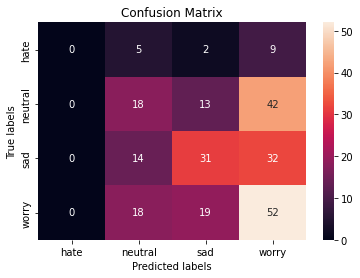

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, lr_pred) 
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [ ]:
nb = Pipeline([
                ('vect', CountVectorizer()),
                ('dens', DenseTransformer()),
                ('clf', GaussianNB()),
              ])

nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [ ]:
accuracy_score(y_test, nb_pred)

0.3568627450980392

In [ ]:
print(metrics.classification_report(y_test, nb_pred, target_names=target_names))

              precision    recall  f1-score   support

        hate       0.15      0.25      0.19        16
     neutral       0.35      0.40      0.37        73
         sad       0.36      0.36      0.36        77
       worry       0.45      0.34      0.38        89

    accuracy                           0.36       255
   macro avg       0.33      0.34      0.33       255
weighted avg       0.37      0.36      0.36       255



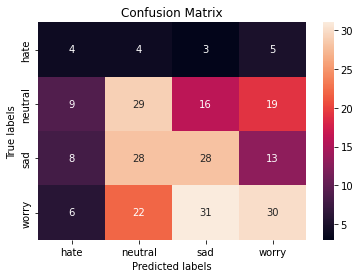

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, nb_pred) 
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);